# Simulation of Nitflex Business Model

Nitflex is a streaming company providing paid content on a subscription-based plan.
The company model generates revenues exclusively through user’s subscription which comprises the following plans:
•	Free Trial (14 days): users subscribe to try the Nitflex services free of charge for a week. The user must provide a credit card during the sign-up process. The user can cancel the free trial at any time during the 14 days; after that, the user is automatically moved to the Basic plan and charged for the first month.
•	Basic Plan: users in the Basic Plan have access to the entire media collection; however, they have a limit of 40 movies a month.
•	Unlimited Plan: users in the Unlimited Plan have access to the entire media collection with no limit.


## Transition Matrix 
I included the visual graph I made just for extra reference. The top represents my initial one and the bottom is the final with all of the probabilities summed up. It can also be viewed in the email that I sent you in regards to the assumptions I made.

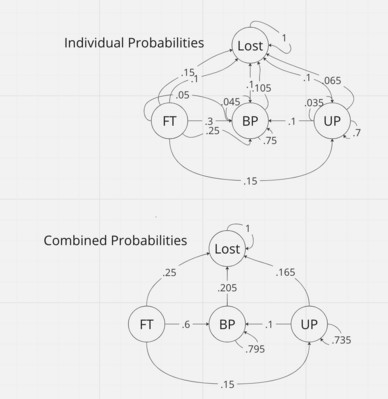


## Define the MM with the transition probabilities (20 Points)
For this, you will need to define: (1) the States and (2) the Transition Probability Matrix

In [1]:
import numpy as np
import random as rm

# Defining the States
states = ['Free Trial', 'Basic Plan', 'Unlimited Plan', 'Lost']

# Defining the transitions
transitionName = [['TFF', 'TFB', 'TFU', 'TFL'], 
                  ['TBF', 'TBB', 'TBU', 'TBL'], 
                  ['TUF', 'TUB', 'TUU', 'TUL'],
                  ['TLF', 'TLB', 'TLU', 'TLL']]

# Probability or Transition Matrix
tMatrix = [[0.0, 0.6, 0.15, 0.25],
           [0.0, 0.795, 0.0, 0.205],
           [0.0, 0.1, 0.735, 0.165],
           [0.0, 0.0, 0.0, 1.0]]

## Is this an Ergodic system? (10 Points)
Write your answer in the next cell.

The system is not ergodic. You can not go from any state to any other state in a set number of transitions. For example, you can not go from the Basic Plan to the Free Trial. There is no path of transitions that would allow this to happened.

## Is there any Absorbing state in this system? (10 Points)
Write your answer in the next cell below. Write the name of the Absorbing state (if any) or simply "No absorbing state" if none of the state is an Absorbing State.

Lost is an absorbing state. It loops back to itself with a probability of 1.

The following functions will check the matrix: make sure your transition Matrix passes the test; otherwise, there is something wrong with you probabilities.

In [41]:
def mult_matrices(m1, m2):
    res = [[0 for x in range(len(m1))] for y in range(len(m2))]  
    for i in range(len(m1)): 
        for j in range(len(m2[0])): 
            for k in range(len(m2)): 
                res[i][j] = round(res[i][j] + m1[i][k] * m2[k][j], 3)
    return res

def checkMatrix(M):
    # The raw probabilities should sum to 1
    n = len(M)
    psum = 0
    result = False
    
    for i in range(0,n):
        psum += sum(M[i])

    if psum == n:
        result = True
    return result

In [3]:
# Checking the probabilities look ok: out probabilities should be equal to 1
if checkMatrix(tMatrix):
    print("Probability Test ... passed.")
else:
    print("The transition matrix has some problem")

Probability Test ... passed.


**IF THE TEST FAIL, FIX YOUR TRANSITION MATRIX**

In [37]:
def simulate(periods, starting_state, states, transitionName, tMatrix):
    current_state = starting_state
    transition_index = 0
    projectedMatrix = tMatrix
    
    transitionList = [states[current_state]]
    period_counter = 1
    # Probability of transitionList
    prob = 1
    
    while period_counter != periods:
        
        next_transition = np.random.choice(transitionName[transition_index],replace=True,p=tMatrix[transition_index])
        next_state_index = transitionName[transition_index].index(next_transition)
        
        if tMatrix[transition_index][next_state_index]>0.0:
            prob = prob * tMatrix[transition_index][next_state_index]
        
        transition_index = next_state_index
        transitionList.append(states[transition_index])
        
        projectedMatrix = mult_matrices(projectedMatrix,projectedMatrix)
        
        period_counter += 1
    return transitionList, states[transition_index], prob, projectedMatrix   

## What would be the distribution of probabilities for each Subscription level 10 years from now? (30 Points)
Simulate the business for 10 periods (each period is 1 year) and look at the simulated transition matrix after 10 years.  
  Comment on that.

In [45]:
periods = 10
starting_state = 0
transition_list, final_state, probability, projected_matrix = simulate(periods, starting_state, states, transitionName, tMatrix) 

print("Possible states: " + str(transition_list))
print("End state after "+ str(periods) + " periods: " + final_state)
print("Probability of the possible sequence of states: " + str(probability))
print()
#Printing projected matrix
for i in range(len(projected_matrix)):
    print(projected_matrix[i])

Possible states: ['Free Trial', 'Basic Plan', 'Basic Plan', 'Basic Plan', 'Basic Plan', 'Basic Plan', 'Lost', 'Lost', 'Lost', 'Lost']
End state after 10 periods: Lost
Probability of the possible sequence of states: 0.04913303887687501

[0.0, 0.0, 0.0, 0.999]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.001]
[0.0, 0.0, 0.0, 1.0]


Write your comments in the next cell.

The final transition matrix tells us the distribution of probabilities after 10 years. In this case, regardless of what state we started at they all transition to lost with a probability of 1 (for the first and third lists, it is not 1, likely because we are rounding). For example, a person with a free trial is 100% likely to be lost 10 years from now. This is likely because lost is an absorbing state, as such, over time, more and more customers will be lost until eventually all are. In terms of the business, this is not a good sign as if the total number of customers were to stay the same (no new customers), all of them would be lost and the business would eventually stop making money and go bankrupt. Nitflex should look into methods to remove said absorbing state and/or other ways to increase their revenue. 

## What Modification would you introduce for Nitflex to be more Successful? (30 Points)
Based on your observations, introduce a change in the business model that would improve the outcome described in the previous point. If you feel there is no need of improvements, simply state: "No improvement necessary."  
  Please, specify your improvements in the form of a new transition matrix.  
  
  Specify your new transition matrix in the next cell.

In [46]:
tMatrix = [[0.0, 0.6, 0.15, 0.25],
           [0.0, 0.795, 0.0, 0.205],
           [0.0, 0.1, 0.735, 0.165],
           [1.0, 0.0, 0.0, 0]] # final vector changed from [0.0, 0.0, 0.0, 1.0]

Run the simulation again (on the same 10 periods) and generate the new simulated transition probabilities.  
  Execute the simulation in the next cell and print the results.

In [52]:
periods = 10
starting_state = 0
transition_list, final_state, probability, projected_matrix = simulate(periods, starting_state, states, transitionName, tMatrix) 

print("Possible states: " + str(transition_list))
print("End state after "+ str(periods) + " periods: " + final_state)
print("Probability of the possible sequence of states: " + str(probability))
print()
#Printing projected matrix
for i in range(len(projected_matrix)):
    print(projected_matrix[i])

Possible states: ['Free Trial', 'Basic Plan', 'Basic Plan', 'Lost', 'Free Trial', 'Basic Plan', 'Basic Plan', 'Basic Plan', 'Basic Plan', 'Basic Plan']
End state after 10 periods: Basic Plan
Probability of the possible sequence of states: 0.023436459544269376

[0.177, 0.575, 0.101, 0.177]
[0.177, 0.575, 0.101, 0.177]
[0.177, 0.575, 0.101, 0.177]
[0.176, 0.572, 0.1, 0.176]


Comment your results

As mentioned before one of the improvements we could make would be to remove the absorbing state. We saw that the tenth year transition matrix had probability of 1 for lost in all instances. If we were to remove the absorbing state, this would likely not occur. The change I made involved removing the absorbing state (TLL = 0) and instead setting the probability of TLF to 1. In terms of the business, this means making the commitment that for every customer Nitflex loses, they will add a new one. This would likely involve the marketing department and doing various kinds of advertising. This results in an updated transition matrix after 10 years. 

The change also resulted in making the system become ergodic. You could go from any state to another with a certain number of transitions. As such, we see that the matrix after 10 years is also approaching equilibrium. All of the different vectors have roughly the same probabilities. The probability distribution regardless of where you started from is the same. The steady state vector would be [0.177, 0.575, 0.101, 0.177]. This tells us that we would need to commit to replacing 17.7% of the overall initial user count to maintain the business at equilibrium (we can calculate the exact number by doing user_count*.177)

Even though I didn't apply the change here, another thing to consider and what we could possibly change would be the probability of moving from basic to unlimited and vice versa. There is a .1 probability of moving from unlimited to basic, but 0 of moving to unlimited from basic. It seems that users tend to downgrade their plan, but never upgrade. Ideally, we would want all customers to get to and stay at the unlimited plan to maximize profit. Again, since this is just an extra suggestion, I didn't create or update those probabilities. Nitflex could achieve more upgrading and retention at that unlimited plan state through providing increased incentives/access to more and newer content at that level. 
